In [1]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize

from sklearn import decomposition, ensemble
import logging
import pandas as pd
import numpy as np
from numpy import random
#import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from nltk.stem import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from nltk.stem import LancasterStemmer, WordNetLemmatizer
porter = PorterStemmer()

import warnings
warnings.filterwarnings('ignore')

import re
from bs4 import BeautifulSoup
%matplotlib inline



In [60]:
df = pd.read_csv('google-maps-single-dataset-for-conference.csv',encoding='ISO-8859-1')
df = df[pd.notnull(df['Rationale_Type'])]
df = df.replace("issue ", "issue")
#df = df.replace("alternative", "new feature")
print(df.Rationale_Type.value_counts())
#print(df.head(10))
#print(df['comment_Text'].apply(lambda x: len(x.split(' '))).sum())

claim      2076
feature     667
issue       308
Name: Rationale_Type, dtype: int64


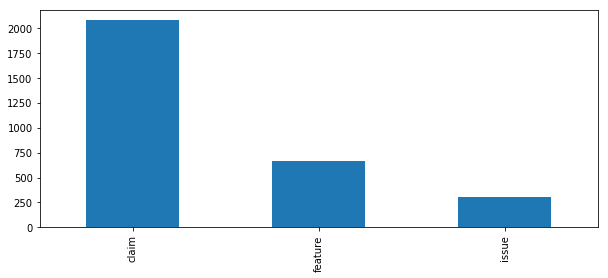

In [61]:
my_tags = ['claim','feature','issue']
plt.figure(figsize=(10,4))
df.Rationale_Type.value_counts().plot(kind='bar');

In [62]:
#vect = CountVectorizer(max_features=1000, binary=True)
#X= vect.fit_transform(df.comment_Text)
#X.toarray()

In [63]:
def print_plot(index):
    example = df[df.index == index][['comment_Text', 'Rationale_Type']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Rationale_Type:', example[1])

In [64]:
print_plot(61)

I've been waiting for this for so long. 

Trying to meet up with friends at a restaurant? Now you know if you should order drinks first or wait for everyone to arrive.

Looking for a friend's house in new construction area? Now you don't have to search street by street.

Why did something like this take Google this long to roll out?
Rationale_Type: claim


In [65]:
#df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\<\>\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z =#+_]')
#STOPWORDS = set(stopwords.words('english'))

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_url(text):
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    return text

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = strip_html(text) 
    text = remove_url(text)
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    #text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    #text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['comment_Text'] = df['comment_Text'].apply(clean_text)
#df['Consumer complaint narrative'] = df['Consumer complaint narrative'].str.replace('\d+', '')

In [66]:
print_plot(61)
#print (df['comment_Text'])


ive been waiting for this for so long trying to meet up with friends at a restaurant now you know if you should order drinks first or wait for everyone to arrivelooking for a friends house in new construction area now you dont have to search street by streetwhy did something like this take google this long to roll out
Rationale_Type: claim


In [67]:
#user_comments= df.comment_Text.values.astype('U')
#rationale_type= df.Rationale_Type.values.astype('U')

In [68]:
lemmatizer = WordNetLemmatizer()
def lemmaSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(lemmatizer.lemmatize(word, pos='v'))        
        stem_sentence.append(" ")
    return "".join(stem_sentence)




In [69]:
user_comments_stemmed = []
#print (df['comment_Text'].values)
for i in df['comment_Text']:
    #print (i)
    user_comments=lemmaSentence(i)
    user_comments_stemmed.append(user_comments)
#print(user_comments_stemmed)

    #allwords_stemmed = tokenize_and_stem(i) # for each item in 'synopses', tokenize/stem
    #totalvocab_stemmed.extend(allwords_stemmed) 
#print(totalvocab_stemmed)

In [70]:
#X = df.comment_Text.values.astype('U')
X = user_comments_stemmed
X = np.array(X)
#X = list(map(int, X))
y = df.Rationale_Type.values.astype('U')


In [71]:
#added extra
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    #fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    #predictions the labels on validation dataset
    predictions= classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions= predictions.argmax(axis= -1)
        
    return predictions

In [72]:
#Kfold classification for NBM, SVM, LR and RF using countvectorizor

kf= KFold(n_splits=10)
#curr_fold= 0
alg_accurcy_NBM =[]
alg_accurcy_SVM =[]
alg_accurcy_LR =[]
alg_accurcy_RF =[]

score_array_NBM= []
score_array_SVM= []
score_array_LR= []
score_array_RF= []
for train_idx, test_idx in kf.split(X):
    X_train, X_test= X[train_idx], X[test_idx]
    y_train, y_test= y[train_idx], y[test_idx]
    vect= CountVectorizer(max_features=10000, binary=True)
    X_train_vect= vect.fit_transform(X_train)
    X_test_vect = vect.transform(X_test)
    encoder= LabelEncoder()
    Y_train_vect= encoder.fit_transform(y_train)
    Y_test_vect= encoder.fit_transform(y_test)
    
    sm= SMOTE()
    X_train_res, y_train_res= sm.fit_sample(X_train_vect, Y_train_vect)
    predictions = train_model(naive_bayes.MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),X_train_res,y_train_res,X_test_vect)
    alg_accurcy_NBM.append(accuracy_score(predictions, Y_test_vect))
    score_array_NBM.append(precision_recall_fscore_support(Y_test_vect,predictions, average=None))
    #print(classification_report(y_test, predictions,target_names=my_tags))
    
    predictions = train_model(svm.SVC(),X_train_res,y_train_res,X_test_vect)
    alg_accurcy_SVM.append(accuracy_score(predictions, Y_test_vect))
    score_array_SVM.append(precision_recall_fscore_support(Y_test_vect,predictions, average=None))
    #print(classification_report(y_test, predictions,target_names=my_tags))
    
    predictions = train_model(linear_model.LogisticRegression(),X_train_res,y_train_res,X_test_vect)
    alg_accurcy_LR.append(accuracy_score(predictions, Y_test_vect))
    score_array_LR.append(precision_recall_fscore_support(Y_test_vect,predictions, average=None))
    #print(classification_report(y_test, predictions,target_names=my_tags))
    
    predictions = train_model(ensemble.RandomForestClassifier(),X_train_res,y_train_res,X_test_vect)
    alg_accurcy_RF.append(accuracy_score(predictions, Y_test_vect))
    score_array_RF.append(precision_recall_fscore_support(Y_test_vect,predictions, average=None))
    #print(classification_report(y_test, predictions,target_names=my_tags))

average_accuracy_NBM= np.mean(alg_accurcy_NBM, axis=0)
print("the average accuracy of NBM is",average_accuracy_NBM)

average_accuracy_SVM= np.mean(alg_accurcy_SVM, axis=0)
print("the average accuracy of SVM is",average_accuracy_SVM)

average_accuracy_LR= np.mean(alg_accurcy_LR, axis=0)
print("the average accuracy of LR is",average_accuracy_LR)

average_accuracy_RF= np.mean(alg_accurcy_RF, axis=0)
print("the average accuracy of RF is",average_accuracy_RF)
    
average_scire_NBM=np.mean(score_array_NBM, axis=0)
print(average_scire_NBM)

average_scire_SVM=np.mean(score_array_SVM, axis=0)
print(average_scire_SVM)

average_scire_LR=np.mean(score_array_LR, axis=0)
print(average_scire_LR)

average_scire_RF=np.mean(score_array_RF, axis=0)
print(average_scire_RF)

the average accuracy of NBM is 0.6542258652094717
the average accuracy of SVM is 0.29596807028822464
the average accuracy of LR is 0.5703278688524589
the average accuracy of RF is 0.5611464695167684
[[7.59597000e-01 4.45788585e-01 2.80383602e-01]
 [7.76493762e-01 4.78649216e-01 1.95301994e-01]
 [7.65843087e-01 4.53502388e-01 2.25754616e-01]
 [2.07600000e+02 6.67000000e+01 3.08000000e+01]]
[[6.73425627e-01 2.00000000e-01 1.14664731e-01]
 [3.19592469e-01 3.90961263e-03 7.67109554e-01]
 [4.29297113e-01 7.66045549e-03 1.97964675e-01]
 [2.07600000e+02 6.67000000e+01 3.08000000e+01]]
[[  0.76928518   0.40071831   0.21743522]
 [  0.61214986   0.49390121   0.39760628]
 [  0.68022498   0.43762103   0.27582139]
 [207.6         66.7         30.8       ]]
[[6.92708505e-01 3.19952349e-01 1.59777012e-01]
 [7.16258546e-01 2.45302229e-01 2.00469469e-01]
 [7.02214470e-01 2.71193569e-01 1.74342359e-01]
 [2.07600000e+02 6.67000000e+01 3.08000000e+01]]


In [73]:
#Kfold classification for NBM, SVM, LR and RF using TFIDF

kf= KFold(n_splits=10)
#curr_fold= 0
alg_accurcy_NBM_tfidf =[]
alg_accurcy_SVM_tfidf =[]
alg_accurcy_LR_tfidf =[]
alg_accurcy_RF_tfidf =[]



#x_train_tfidf

score_array_NBM_tfidf= []
score_array_SVM_tfidf= []
score_array_LR_tfidf= []
score_array_RF_tfidf= []
for train_idx, test_idx in kf.split(X):
    X_train, X_test= X[train_idx], X[test_idx]
    y_train, y_test= y[train_idx], y[test_idx]
    tfidf_vect= TfidfVectorizer(analyzer='word', token_pattern= r'\w{1,}', max_features=5000)
    tfidf_vect.fit(X_train)
    x_train_tfidf=tfidf_vect.transform(X_train)
    x_test_tfidf=tfidf_vect.transform(X_test)
    sm= SMOTE()
    X_train_res_tfidf, y_train_res_tfidf= sm.fit_sample(x_train_tfidf, y_train)
    predictions = train_model(naive_bayes.MultinomialNB(),X_train_res_tfidf,y_train_res_tfidf,x_test_tfidf)
    alg_accurcy_NBM_tfidf.append(accuracy_score(predictions, y_test))
    score_array_NBM_tfidf.append(precision_recall_fscore_support(y_test,predictions, average=None))
    #print(classification_report(y_test, predictions,target_names=my_tags))
    
    predictions = train_model(svm.SVC(),X_train_res_tfidf,y_train_res_tfidf,x_test_tfidf)
    alg_accurcy_SVM_tfidf.append(accuracy_score(predictions, y_test))
    score_array_SVM_tfidf.append(precision_recall_fscore_support(y_test,predictions, average=None))
    #print(classification_report(y_test, predictions,target_names=my_tags))
    
    predictions = train_model(linear_model.LogisticRegression(),X_train_res_tfidf,y_train_res_tfidf,x_test_tfidf)
    alg_accurcy_LR_tfidf.append(accuracy_score(predictions, y_test))
    score_array_LR_tfidf.append(precision_recall_fscore_support(y_test,predictions, average=None))
    #print(classification_report(y_test, predictions,target_names=my_tags))
    
    predictions = train_model(ensemble.RandomForestClassifier(),X_train_res_tfidf,y_train_res_tfidf,x_test_tfidf)
    alg_accurcy_RF_tfidf.append(accuracy_score(predictions, y_test))
    score_array_RF_tfidf.append(precision_recall_fscore_support(y_test,predictions, average=None))
    #print(classification_report(y_test, predictions,target_names=my_tags))

average_accuracy_NBM_tfidf= np.mean(alg_accurcy_NBM_tfidf, axis=0)
print("the average accuracy of NBM is",average_accuracy_NBM_tfidf)

average_accuracy_SVM_tfidf= np.mean(alg_accurcy_SVM_tfidf, axis=0)
print("the average accuracy of SVM is",average_accuracy_SVM_tfidf)

average_accuracy_LR_tfidf= np.mean(alg_accurcy_LR_tfidf, axis=0)
print("the average accuracy of LR is",average_accuracy_LR_tfidf)

average_accuracy_RF_tfidf= np.mean(alg_accurcy_RF_tfidf, axis=0)
print("the average accuracy of RF is",average_accuracy_RF_tfidf)
    
average_scire_NBM_tfidf=np.mean(score_array_NBM_tfidf, axis=0)
print(average_scire_NBM_tfidf)

average_scire_SVM_tfidf=np.mean(score_array_SVM_tfidf, axis=0)
print(average_scire_SVM_tfidf)

average_scire_LR_tfidf=np.mean(score_array_LR_tfidf, axis=0)
print(average_scire_LR_tfidf)

average_scire_RF_tfidf=np.mean(score_array_RF_tfidf, axis=0)
print(average_scire_RF_tfidf)

the average accuracy of NBM is 0.5303407264545162
the average accuracy of SVM is 0.6624022286510233
the average accuracy of LR is 0.6614411228972462
the average accuracy of RF is 0.6391288974606236
[[  0.85486225   0.36689658   0.22982165]
 [  0.48042934   0.7205882    0.41720352]
 [  0.61214047   0.47805091   0.29283551]
 [207.6         66.7         30.8       ]]
[[7.25257447e-01 4.36422490e-01 4.01730769e-01]
 [8.53300721e-01 3.22875686e-01 7.91632234e-02]
 [7.79427673e-01 3.33844164e-01 1.17279749e-01]
 [2.07600000e+02 6.67000000e+01 3.08000000e+01]]
[[  0.81341551   0.49913024   0.29519004]
 [  0.72346789   0.57202693   0.41891403]
 [  0.76454438   0.52491293   0.34119064]
 [207.6         66.7         30.8       ]]
[[7.17412857e-01 3.91109344e-01 2.33530907e-01]
 [8.28583831e-01 2.91128496e-01 1.24007097e-01]
 [7.66704610e-01 3.25919485e-01 1.55134048e-01]
 [2.07600000e+02 6.67000000e+01 3.08000000e+01]]


In [74]:
#Kfold classification for NBM, SVM, LR and RF using TFIDF-ngram with analizer= 'word' and ngram=1-3

kf= KFold(n_splits=10)
#curr_fold= 0
alg_accurcy_NBM_tfidf_W_ngram =[]
alg_accurcy_SVM_tfidf_W_ngram =[]
alg_accurcy_LR_tfidf_W_ngram =[]
alg_accurcy_RF_tfidf_W_ngram =[]



#x_train_tfidf

score_array_NBM_tfidf_W_ngram= []
score_array_SVM_tfidf_W_ngram= []
score_array_LR_tfidf_W_ngram= []
score_array_RF_tfidf_W_ngram= []
for train_idx, test_idx in kf.split(X):
    X_train, X_test= X[train_idx], X[test_idx]
    y_train, y_test= y[train_idx], y[test_idx]
    
    tfidf_vect_ngram= TfidfVectorizer(analyzer='word', token_pattern= r'\w{1,}', ngram_range=(1,3), max_features=5000)
    tfidf_vect_ngram.fit(X_train)
    x_train_ngram=tfidf_vect_ngram.transform(X_train)
    x_test_ngram=tfidf_vect_ngram.transform(X_test)
    
    sm= SMOTE()
    X_train_res_tfidf_ngram, y_train_res_tfidf_ngram= sm.fit_sample(x_train_ngram, y_train)

    
    predictions = train_model(naive_bayes.MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),X_train_res_tfidf_ngram,y_train_res_tfidf_ngram,x_test_ngram)
    alg_accurcy_NBM_tfidf_W_ngram.append(accuracy_score(predictions, y_test))
    score_array_NBM_tfidf_W_ngram.append(precision_recall_fscore_support(y_test,predictions, average=None))
    
    predictions = train_model(svm.SVC(),X_train_res_tfidf_ngram,y_train_res_tfidf_ngram,x_test_ngram)
    alg_accurcy_SVM_tfidf_W_ngram.append(accuracy_score(predictions, y_test))
    score_array_SVM_tfidf_W_ngram.append(precision_recall_fscore_support(y_test,predictions, average=None))
    
    predictions = train_model(linear_model.LogisticRegression(),X_train_res_tfidf_ngram,y_train_res_tfidf_ngram,x_test_ngram)
    alg_accurcy_LR_tfidf_W_ngram.append(accuracy_score(predictions, y_test))
    score_array_LR_tfidf_W_ngram.append(precision_recall_fscore_support(y_test,predictions, average=None))
    
    predictions = train_model(ensemble.RandomForestClassifier(),X_train_res_tfidf_ngram,y_train_res_tfidf_ngram,x_test_ngram)
    alg_accurcy_RF_tfidf_W_ngram.append(accuracy_score(predictions, y_test))
    score_array_RF_tfidf_W_ngram.append(precision_recall_fscore_support(y_test,predictions, average=None))

average_accuracy_NBM_tfidf_W_ngram= np.mean(alg_accurcy_NBM_tfidf_W_ngram, axis=0)
print("the average accuracy of NBM is",average_accuracy_NBM_tfidf_W_ngram)

average_accuracy_SVM_tfidf_W_ngram= np.mean(alg_accurcy_SVM_tfidf_W_ngram, axis=0)
print("the average accuracy of SVM is",average_accuracy_SVM_tfidf_W_ngram)

average_accuracy_LR_tfidf_W_ngram= np.mean(alg_accurcy_LR_tfidf_W_ngram, axis=0)
print("the average accuracy of LR is",average_accuracy_LR_tfidf_W_ngram)

average_accuracy_RF_tfidf_W_ngram= np.mean(alg_accurcy_RF_tfidf_W_ngram, axis=0)
print("the average accuracy of RF is",average_accuracy_RF_tfidf_W_ngram)
    
average_scire_NBM_tfidf_W_ngram=np.mean(score_array_NBM_tfidf_W_ngram, axis=0)
print(average_scire_NBM_tfidf_W_ngram)

average_scire_SVM_tfidf_W_ngram=np.mean(score_array_SVM_tfidf_W_ngram, axis=0)
print(average_scire_SVM_tfidf_W_ngram)

average_scire_LR_tfidf_W_ngram=np.mean(score_array_LR_tfidf_W_ngram, axis=0)
print(average_scire_LR_tfidf_W_ngram)

average_scire_RF_tfidf_W_ngram=np.mean(score_array_RF_tfidf_W_ngram, axis=0)
print(average_scire_RF_tfidf_W_ngram)

the average accuracy of NBM is 0.6263548698167791
the average accuracy of SVM is 0.6925415193399764
the average accuracy of LR is 0.6460323582985106
the average accuracy of RF is 0.6689628201007178
[[  0.80159148   0.44433729   0.27523762]
 [  0.67005504   0.53447787   0.46141263]
 [  0.72893784   0.47837833   0.34149605]
 [207.6         66.7         30.8       ]]
[[7.26576937e-01 5.50332640e-01 4.01029716e-01]
 [9.24825810e-01 1.91841883e-01 2.01271534e-01]
 [8.09994437e-01 2.47890675e-01 2.53402990e-01]
 [2.07600000e+02 6.67000000e+01 3.08000000e+01]]
[[  0.79372709   0.43094738   0.33831366]
 [  0.71263736   0.528922     0.40193878]
 [  0.74996828   0.46852921   0.36267301]
 [207.6         66.7         30.8       ]]
[[7.27188945e-01 4.61524206e-01 2.69468473e-01]
 [8.61190663e-01 3.03944026e-01 1.24937262e-01]
 [7.86973487e-01 3.56745669e-01 1.64216226e-01]
 [2.07600000e+02 6.67000000e+01 3.08000000e+01]]


In [75]:
#Kfold classification for NBM, SVM, LR and RF using TFIDF-ngram with analizer= 'char' and ngram=1-3

kf= KFold(n_splits=10)
#curr_fold= 0
alg_accurcy_NBM_C_tfidf =[]
alg_accurcy_SVM_C_tfidf =[]
alg_accurcy_LR_C_tfidf =[]
alg_accurcy_RF_C_tfidf =[]



#x_train_tfidf

score_array_NBM_C_tfidf= []
score_array_SVM_C_tfidf= []
score_array_LR_C_tfidf= []
score_array_RF_C_tfidf= []
for train_idx, test_idx in kf.split(X):
    X_train, X_test= X[train_idx], X[test_idx]
    y_train, y_test= y[train_idx], y[test_idx]
    tfidf_vect_ngram_chars= TfidfVectorizer(analyzer='char', token_pattern= r'\w{1,}', ngram_range=(2,3), max_features=5000)
    tfidf_vect_ngram_chars.fit(X_train)
    x_train_ngram_char=tfidf_vect_ngram_chars.transform(X_train)
    x_test_ngram_char=tfidf_vect_ngram_chars.transform(X_test)
    sm= SMOTE()
    X_train_res_tfidf_ngram_char, y_train_res_tfidf_ngram_char= sm.fit_sample(x_train_ngram_char, y_train)
    
    predictions = train_model(naive_bayes.MultinomialNB(),X_train_res_tfidf_ngram_char,y_train_res_tfidf_ngram_char,x_test_ngram_char)
    alg_accurcy_NBM_C_tfidf.append(accuracy_score(predictions, y_test))
    score_array_NBM_C_tfidf.append(precision_recall_fscore_support(y_test,predictions, average=None))
    #print(classification_report(y_test, predictions,target_names=my_tags))
    
    predictions = train_model(svm.SVC(),X_train_res_tfidf_ngram_char,y_train_res_tfidf_ngram_char,x_test_ngram_char)
    alg_accurcy_SVM_C_tfidf.append(accuracy_score(predictions, y_test))
    score_array_SVM_C_tfidf.append(precision_recall_fscore_support(y_test,predictions, average=None))
    #print(classification_report(y_test, predictions,target_names=my_tags))
    
    predictions = train_model(linear_model.LogisticRegression(),X_train_res_tfidf_ngram_char,y_train_res_tfidf_ngram_char,x_test_ngram_char)
    alg_accurcy_LR_C_tfidf.append(accuracy_score(predictions, y_test))
    score_array_LR_C_tfidf.append(precision_recall_fscore_support(y_test,predictions, average=None))
    #print(classification_report(y_test, predictions,target_names=my_tags))
    
    predictions = train_model(ensemble.RandomForestClassifier(),X_train_res_tfidf_ngram_char,y_train_res_tfidf_ngram_char,x_test_ngram_char)
    alg_accurcy_RF_C_tfidf.append(accuracy_score(predictions, y_test))
    score_array_RF_C_tfidf.append(precision_recall_fscore_support(y_test,predictions, average=None))
    #print(classification_report(y_test, predictions,target_names=my_tags))

average_accuracy_NBM_C_tfidf= np.mean(alg_accurcy_NBM_C_tfidf, axis=0)
print("the average accuracy of NBM is",average_accuracy_NBM_C_tfidf)

average_accuracy_SVM_C_tfidf= np.mean(alg_accurcy_SVM_C_tfidf, axis=0)
print("the average accuracy of SVM is",average_accuracy_SVM_C_tfidf)

average_accuracy_LR_C_tfidf= np.mean(alg_accurcy_LR_C_tfidf, axis=0)
print("the average accuracy of LR is",average_accuracy_LR_C_tfidf)

average_accuracy_RF_C_tfidf= np.mean(alg_accurcy_RF_C_tfidf, axis=0)
print("the average accuracy of RF is",average_accuracy_RF_C_tfidf)
    
average_scire_NBM_C_tfidf=np.mean(score_array_NBM_C_tfidf, axis=0)
print(average_scire_NBM_C_tfidf)

average_scire_SVM_C_tfidf=np.mean(score_array_SVM_C_tfidf, axis=0)
print(average_scire_SVM_tfidf)

average_scire_LR_C_tfidf=np.mean(score_array_LR_C_tfidf, axis=0)
print(average_scire_LR_C_tfidf)

average_scire_RF_C_tfidf=np.mean(score_array_RF_C_tfidf, axis=0)
print(average_scire_RF_C_tfidf)

the average accuracy of NBM is 0.524091931854709
the average accuracy of SVM is 0.5260441444337298
the average accuracy of LR is 0.6368434586949533
the average accuracy of RF is 0.6299442837244188
[[  0.84302804   0.37351216   0.21304428]
 [  0.47598313   0.67914105   0.45204765]
 [  0.60412415   0.47619159   0.28724113]
 [207.6         66.7         30.8       ]]
[[7.25257447e-01 4.36422490e-01 4.01730769e-01]
 [8.53300721e-01 3.22875686e-01 7.91632234e-02]
 [7.79427673e-01 3.33844164e-01 1.17279749e-01]
 [2.07600000e+02 6.67000000e+01 3.08000000e+01]]
[[  0.80584233   0.44786618   0.26467709]
 [  0.69665842   0.54334464   0.39287662]
 [  0.74608855   0.48603319   0.31314579]
 [207.6         66.7         30.8       ]]
[[7.10559638e-01 3.41577969e-01 1.63564282e-01]
 [8.31733361e-01 2.50798772e-01 7.40328310e-02]
 [7.64892564e-01 2.86183294e-01 9.76662566e-02]
 [2.07600000e+02 6.67000000e+01 3.08000000e+01]]


In [53]:
authoers_name= []
authoers_name= df.comment_author.tolist()
print(len(authoers_name))

3051


In [41]:
import collections 
from itertools import groupby
import operator
temp= set(authoers_name) # temp contains authors names from the dataset
#print(temp)
print("the length of authors",len(temp))
result={}
author_rationale_elements_index= [] # list for identifying each author index elements
author_rationale_elements_names= [] # list for identifying each author rationale elements

#j=1
for i in temp: #loop over authors
    #print(i)
    
    if authoers_name.count(i) >= 2: # code for identifying authors who contributed more then 1.
        
        if i== "no author":
            continue
        else:
            
            #identify indexes of authors to identify corresponding rationale elements     
            author_rationale_elements=df.loc[df.comment_author == i, 'Rationale_Type'].index.values  
            print("the index of rationale element is",author_rationale_elements)
            # make a loop to identify rationale element based on index value identified in previous step.
            for k in author_rationale_elements:
                rationale_names= df.loc[df.comment_author == i, 'Rationale_Type'][k]
                author_rationale_elements_names.append(rationale_names)
                count_total_rationale_elements= len(author_rationale_elements_names)
            print("the author is", i,",", "total count of comments are", count_total_rationale_elements,author_rationale_elements_names)
            # count each rationale element proposed by crowd user
            each_rationale_count= {x:author_rationale_elements_names.count(x) for x in author_rationale_elements_names}
            print (each_rationale_count)
            #print([len(list(group)) for key, group in groupby(author_rationale_elements_names)])

            author_rationale_elements_names= []
            result[i]=authoers_name.count(i)
#print(result)

#sorted_result= collections.OrderedDict(sorted_result)
sorted_result= sorted(result.items(), key=operator.itemgetter(1))
sorted_result.reverse()
print(sorted_result)

#code for removing empty values and key form dictionary 
if "no auther" in result:
    del result["no auther"]

the length of authors 1715
the index of rationale element is [869 908 909]
the author is dsk , total count of comments are 3 ['claim-supporting', 'claim-attacking', 'feature']
{'claim-supporting': 1, 'claim-attacking': 1, 'feature': 1}
the index of rationale element is [1219 1497]
the author is Dethsturm , total count of comments are 2 ['feature', 'claim-attacking']
{'feature': 1, 'claim-attacking': 1}
the index of rationale element is [50 52]
the author is iBajan , total count of comments are 2 ['issue', 'claim-attacking']
{'issue': 1, 'claim-attacking': 1}
the index of rationale element is [1945 2010]
the author is tevelizor , total count of comments are 2 ['claim-supporting', 'claim-supporting']
{'claim-supporting': 2}
the index of rationale element is [1242 1328]
the author is Pascalwb , total count of comments are 2 ['issue', 'claim-attacking']
{'issue': 1, 'claim-attacking': 1}
the index of rationale element is [2349 2410]
the author is djgump35 , total count of comments are 2 ['

the author is curiousthrowaway_1 , total count of comments are 2 ['claim-supporting', 'claim-supporting']
{'claim-supporting': 2}
the index of rationale element is [1288 1348]
the author is sovanyio , total count of comments are 2 ['claim-supporting', 'claim-attacking']
{'claim-supporting': 1, 'claim-attacking': 1}
the index of rationale element is [1670 1803]
the author is pvtjace , total count of comments are 2 ['claim-supporting', 'claim-supporting']
{'claim-supporting': 2}
the index of rationale element is [ 974  976 1055]
the author is PantherHeel93 , total count of comments are 3 ['feature', 'feature', 'claim-supporting']
{'feature': 2, 'claim-supporting': 1}
the index of rationale element is [868 873 876]
the author is TupperwareConspiracy , total count of comments are 3 ['issue', 'feature', 'issue']
{'issue': 2, 'feature': 1}
the index of rationale element is [1135 1137]
the author is bisjac , total count of comments are 2 ['claim-supporting', 'issue']
{'claim-supporting': 1, '

the author is jook11 , total count of comments are 4 ['claim-attacking', 'issue', 'issue', 'claim-supporting']
{'claim-attacking': 1, 'issue': 2, 'claim-supporting': 1}
the index of rationale element is [420 422 492 498]
the author is KiloD2 , total count of comments are 4 ['feature', 'feature', 'claim-supporting', 'claim-attacking']
{'feature': 2, 'claim-supporting': 1, 'claim-attacking': 1}
the index of rationale element is [ 683 1301 1303 1305 1325 1340 1343 1390 2348]
the author is DigitalChocobo , total count of comments are 9 ['feature', 'claim-attacking', 'claim-attacking', 'claim-attacking', 'feature', 'claim-attacking', 'claim-attacking', 'issue', 'feature']
{'feature': 3, 'claim-attacking': 5, 'issue': 1}
the index of rationale element is [1791 1793]
the author is curious_iguana , total count of comments are 2 ['claim-attacking', 'claim-attacking']
{'claim-attacking': 2}
the index of rationale element is [2871 3188]
the author is ThereIsSoMuchMore , total count of comments ar

{'claim-supporting': 1, 'claim-attacking': 1}
the index of rationale element is [774 776 778 782]
the author is _HULK_SMASH_ , total count of comments are 4 ['claim-supporting', 'claim-supporting', 'claim-supporting', 'claim-supporting']
{'claim-supporting': 4}
the index of rationale element is [2300 2303 2566 2570 2573 2575 2577 2579 2581 2583]
the author is Pennigans , total count of comments are 10 ['claim-supporting', 'claim-attacking', 'feature', 'claim-attacking', 'claim-supporting', 'claim-attacking', 'claim-attacking', 'claim-attacking', 'claim-supporting', 'claim-supporting']
{'claim-supporting': 4, 'claim-attacking': 5, 'feature': 1}
the index of rationale element is [1778 2901 2903]
the author is djh816 , total count of comments are 3 ['issue', 'feature', 'claim-supporting']
{'issue': 1, 'feature': 1, 'claim-supporting': 1}
the index of rationale element is [1394 1491]
the author is SanguinePar , total count of comments are 2 ['claim-supporting', 'claim-supporting']
{'claim-

the author is Chevellephreak , total count of comments are 2 ['issue', 'claim-supporting']
{'issue': 1, 'claim-supporting': 1}
the index of rationale element is [2309 2350 2643]
the author is efstajas , total count of comments are 3 ['claim-attacking', 'feature', 'claim-attacking']
{'claim-attacking': 2, 'feature': 1}
the index of rationale element is [1878 1880]
the author is Amiral_Adamas , total count of comments are 2 ['issue', 'claim-supporting']
{'issue': 1, 'claim-supporting': 1}
the index of rationale element is [2863 2865]
the author is Cbracher , total count of comments are 2 ['claim-attacking', 'claim-attacking']
{'claim-attacking': 2}
the index of rationale element is [2509 3257]
the author is minidanjer , total count of comments are 2 ['claim-supporting', 'feature']
{'claim-supporting': 1, 'feature': 1}
the index of rationale element is [ 836  916 1060]
the author is socsa , total count of comments are 3 ['claim-attacking', 'feature', 'claim-attacking']
{'claim-attacking':

the author is GreenFox1505 , total count of comments are 4 ['feature', 'claim-attacking', 'claim-attacking', 'issue']
{'feature': 1, 'claim-attacking': 2, 'issue': 1}
the index of rationale element is [2313 2315]
the author is DirkBelig , total count of comments are 2 ['claim-attacking', 'claim-attacking']
{'claim-attacking': 2}
the index of rationale element is [1956 1958]
the author is Sardond , total count of comments are 2 ['claim-supporting', 'issue']
{'claim-supporting': 1, 'issue': 1}
the index of rationale element is [522 528]
the author is mindonshuffle , total count of comments are 2 ['feature', 'claim-supporting']
{'feature': 1, 'claim-supporting': 1}
the index of rationale element is [1336 1338]
the author is walesmd , total count of comments are 2 ['claim-supporting', 'issue']
{'claim-supporting': 1, 'issue': 1}
the index of rationale element is [3196 3199]
the author is joefuf , total count of comments are 2 ['feature', 'claim-supporting']
{'feature': 1, 'claim-supporting

the author is scottevil110 , total count of comments are 2 ['feature', 'claim-supporting']
{'feature': 1, 'claim-supporting': 1}
the index of rationale element is [ 487 3285 3303]
the author is davidgro , total count of comments are 3 ['feature', 'claim-attacking', 'issue']
{'feature': 1, 'claim-attacking': 1, 'issue': 1}
the index of rationale element is [3174 3244]
the author is tiny_octopus , total count of comments are 2 ['claim-supporting', 'claim-attacking']
{'claim-supporting': 1, 'claim-attacking': 1}
the index of rationale element is [126 256]
the author is 3entendre , total count of comments are 2 ['claim-supporting', 'claim-attacking']
{'claim-supporting': 1, 'claim-attacking': 1}
the index of rationale element is [3055 3181]
the author is IshKebab , total count of comments are 2 ['claim-attacking', 'feature']
{'claim-attacking': 1, 'feature': 1}
the index of rationale element is [772 823 966]
the author is rman18 , total count of comments are 3 ['claim-attacking', 'claim-su

the author is jorvay , total count of comments are 2 ['claim-supporting', 'claim-attacking']
{'claim-supporting': 1, 'claim-attacking': 1}
the index of rationale element is [2846 2849 2856]
the author is Dopple_Deaner , total count of comments are 3 ['feature', 'claim-attacking', 'feature']
{'feature': 2, 'claim-attacking': 1}
the index of rationale element is [317 356]
the author is Fhajad , total count of comments are 2 ['feature', 'claim-supporting']
{'feature': 1, 'claim-supporting': 1}
the index of rationale element is [678 685]
the author is diffcalculus , total count of comments are 2 ['claim-supporting', 'feature']
{'claim-supporting': 1, 'feature': 1}
the index of rationale element is [1832 1834 3232]
the author is jealoussizzle , total count of comments are 3 ['claim-attacking', 'issue', 'feature']
{'claim-attacking': 1, 'issue': 1, 'feature': 1}
the index of rationale element is [ 448  452 3061 3063]
the author is needlzor , total count of comments are 4 ['issue', 'issue', '

In [ ]:
huffalump1(3f) ProfWhite (3f, 1su) MadHaterz (2f), trashtalk99 (2 issues), Sir_Clyph (2f), TupperwareConspiracy (2f, 1 issue)
segagamer (2f), I_Like_Your_Pooper (2is), wtf_are_you_talking (3issu, i sup) wayoverpaid (3f), johnrclem (3f), dlerium (4f, 1s,3s)
gologologolo (4issue), alvareo-(3issue, 1 f) Mavamaarten (3f, 1s, 2at, 1s)